# show reconstruct image

In [1]:
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

In [16]:
with open('{}/{}_history.pkl'.format(PKL_DIR, 'valve'), 'rb') as file:
    history = pickle.load(file)

In [17]:
history['reconstruct_img']['input'][0].shape

torch.Size([20, 64, 512, 1])

In [113]:
epoch_num = 6 # * 10

In [114]:
input_img = history['reconstruct_img']['input'][epoch_num][8,:,:,0].to('cpu')
output_img = history['reconstruct_img']['output'][epoch_num][8,:,:,0].to('cpu')

In [115]:
input_img.shape

torch.Size([64, 512])

In [116]:
np.array(F.mse_loss(output_img, input_img))

array(1.1534678, dtype=float32)

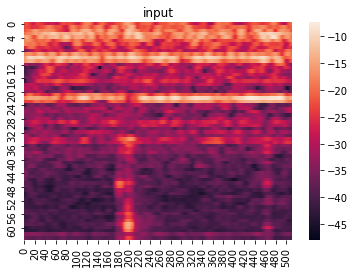

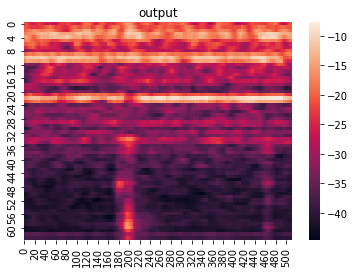

In [112]:
sns.heatmap(input_img)
plt.title('input')
plt.show()
sns.heatmap(output_img)
plt.title('output')
plt.show()

# eval

## import library

In [1]:
########################################################################
# import default python-library
########################################################################
import os
import glob
import csv
import re
import itertools
import sys
from collections import defaultdict
########################################################################


########################################################################
# import additional python-library
########################################################################
import numpy
from sklearn import metrics
import common as com
import pytorch_modeler as modeler
from pytorch_model import CNN6PANNsAutoEncoder as Model
import torch.utils.data
import yaml
yaml.warnings({'YAMLLoadWarning': False})
import matplotlib.pyplot as plt
import seaborn as sns
########################################################################
import eval_functions as eval_func

## Setting

In [2]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

In [3]:
########################################################################
# Setting seed
########################################################################
modeler.set_seed(42)

In [4]:
########################################################################
# Setting I/O path
########################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_path = INPUT_ROOT + "/dev_data"
add_dev_path = INPUT_ROOT + "/add_dev_data"
eval_path = INPUT_ROOT + "/eval_test"
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
# machine type
MACHINE_TYPE = config['IO_OPTION']['MACHINE_TYPE']
machine_types = os.listdir(dev_path)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
RESULT_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/result'
RECONS_OUTDIR = OUTPUT_ROOT +'/eval_reconstruct_img'
os.makedirs(MODEL_DIR, exist_ok=True)

In [5]:
########################################################################
# for original function
########################################################################
param = {}
param["dev_directory"] = dev_path
param["eval_directory"] = eval_path
param["model_directory"] = MODEL_DIR
param["result_directory"] = RESULT_DIR
param["result_file"] = 'result.csv'

## run eval

In [6]:
def make_reconstruct_img(x, y, label, file_name):
    fig = plt.figure(figsize=(10,5)) # width, height
    fig.suptitle('label={}'.format(int(label)))
    ax1 = fig.add_subplot(121, title='x') # 明示的にAxesを作成する
    sns.heatmap(x, ax=ax1) # ax1を参照するようにする
    ax2 = fig.add_subplot(122, title='y')
    sns.heatmap(y, ax=ax2)
    fig.savefig('{}.png'.format(file_name))

In [7]:
mode = 'dev'

2020-10-15 18:53:54,373 - INFO - load_directory <- development
2020-10-15 18:53:54,375 - INFO - ===========================
2020-10-15 18:53:54,376 - INFO - [1/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar
2020-10-15 18:53:54,376 - INFO - ============== MODEL LOAD ==============
2020-10-15 18:53:55,861 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_01
2020-10-15 18:53:55,869 - INFO - test_file  num : 601
2020-10-15 18:53:55,870 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-15 18:54:06,052 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_ToyCar_id_01.csv
2020-10-15 18:54:06,055 - INFO - AUC : 0.5014001138303927
2020-10-15 18:54:06,056 - INFO - pAUC : 0.5169397597579606
2020-10-15 18:54:06,057 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:54:06,057 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_02
2020-10-15 18:54:06,069 - INFO - test_file  num : 602
2020-10-15 18:54:06,070 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-15 18:54:15,991 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_ToyCar_id_02.csv
2020-10-15 18:54:15,994 - INFO - AUC : 0.4974943310657596
2020-10-15 18:54:15,995 - INFO - pAUC : 0.5178422246091419
2020-10-15 18:54:15,995 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:54:15,996 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_03
2020-10-15 18:54:16,006 - INFO - test_file  num : 602
2020-10-15 18:54:16,006 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-15 18:54:25,882 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_ToyCar_id_03.csv
2020-10-15 18:54:25,885 - INFO - AUC : 0.501326530612245
2020-10-15 18:54:25,885 - INFO - pAUC : 0.5164100728010502
2020-10-15 18:54:25,886 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:54:25,886 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_04
2020-10-15 18:54:25,896 - INFO - test_file  num : 602
2020-10-15 18:54:25,896 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-15 18:54:35,672 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_ToyCar_id_04.csv
2020-10-15 18:54:35,675 - INFO - AUC : 0.4938095238095238
2020-10-15 18:54:35,676 - INFO - pAUC : 0.5162907268170426
2020-10-15 18:54:35,677 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:54:35,677 - INFO - ===========================
2020-10-15 18:54:35,677 - INFO - [2/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor
2020-10-15 18:54:35,678 - INFO - ============== MODEL LOAD ==============
2020-10-15 18:54:36,043 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_01
2020-10-15 18:54:36,053 - INFO - test_file  num : 1181
2020-10-15 18:54:36,054 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-10-15 18:54:53,291 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_ToyConveyor_id_01.csv
2020-10-15 18:54:53,294 - INFO - AUC : 0.5330905511811024
2020-10-15 18:54:53,295 - INFO - pAUC : 0.5023656582400884
2020-10-15 18:54:53,296 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:54:53,296 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_02
2020-10-15 18:54:53,308 - INFO - test_file  num : 1136
2020-10-15 18:54:53,309 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:55:09,619 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_ToyConveyor_id_02.csv
2020-10-15 18:55:09,622 - INFO - AUC : 0.5406212797619048
2020-10-15 18:55:09,623 - INFO - pAUC : 0.5007244674185464
2020-10-15 18:55:09,623 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:55:09,624 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_03
2020-10-15 18:55:09,636 - INFO - test_file  num : 1135
2020-10-15 18:55:09,637 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:55:26,502 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_ToyConveyor_id_03.csv
2020-10-15 18:55:26,506 - INFO - AUC : 0.5559963347040944
2020-10-15 18:55:26,507 - INFO - pAUC : 0.5084982481234375
2020-10-15 18:55:26,507 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:55:26,508 - INFO - ===========================
2020-10-15 18:55:26,508 - INFO - [3/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan
2020-10-15 18:55:26,509 - INFO - ============== MODEL LOAD ==============
2020-10-15 18:55:26,864 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_00
2020-10-15 18:55:26,875 - INFO - test_file  num : 489
2020-10-15 18:55:26,876 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been o

2020-10-15 18:55:35,361 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_fan_id_00.csv
2020-10-15 18:55:35,364 - INFO - AUC : 0.46737789203084834
2020-10-15 18:55:35,365 - INFO - pAUC : 0.4895142741171695
2020-10-15 18:55:35,366 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:55:35,366 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_02
2020-10-15 18:55:35,373 - INFO - test_file  num : 441
2020-10-15 18:55:35,374 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:55:43,625 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_fan_id_02.csv
2020-10-15 18:55:43,628 - INFO - AUC : 0.6102932551319649
2020-10-15 18:55:43,629 - INFO - pAUC : 0.5525544065442198
2020-10-15 18:55:43,630 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:55:43,630 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_04
2020-10-15 18:55:43,637 - INFO - test_file  num : 430
2020-10-15 18:55:43,638 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:55:51,652 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_fan_id_04.csv
2020-10-15 18:55:51,656 - INFO - AUC : 0.463939393939394
2020-10-15 18:55:51,657 - INFO - pAUC : 0.49186602870813395
2020-10-15 18:55:51,657 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:55:51,658 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_06
2020-10-15 18:55:51,665 - INFO - test_file  num : 443
2020-10-15 18:55:51,666 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:55:59,914 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_fan_id_06.csv
2020-10-15 18:55:59,918 - INFO - AUC : 0.5262973760932944
2020-10-15 18:55:59,919 - INFO - pAUC : 0.4905631425502532
2020-10-15 18:55:59,920 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:55:59,920 - INFO - ===========================
2020-10-15 18:55:59,921 - INFO - [4/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump
2020-10-15 18:55:59,921 - INFO - ============== MODEL LOAD ==============
2020-10-15 18:56:00,269 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_00
2020-10-15 18:56:00,274 - INFO - test_file  num : 237
2020-10-15 18:56:00,275 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened.

2020-10-15 18:56:05,885 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_pump_id_00.csv
2020-10-15 18:56:05,889 - INFO - AUC : 0.7633576642335765
2020-10-15 18:56:05,890 - INFO - pAUC : 0.6262005378409528
2020-10-15 18:56:05,890 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:05,891 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_02
2020-10-15 18:56:05,895 - INFO - test_file  num : 205
2020-10-15 18:56:05,896 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:56:10,790 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_pump_id_02.csv
2020-10-15 18:56:10,793 - INFO - AUC : 0.628095238095238
2020-10-15 18:56:10,794 - INFO - pAUC : 0.5939849624060151
2020-10-15 18:56:10,795 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:10,795 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_04
2020-10-15 18:56:10,800 - INFO - test_file  num : 194
2020-10-15 18:56:10,801 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:56:15,806 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_pump_id_04.csv
2020-10-15 18:56:15,810 - INFO - AUC : 0.771595744680851
2020-10-15 18:56:15,810 - INFO - pAUC : 0.5565509518477043
2020-10-15 18:56:15,811 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:15,811 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_06
2020-10-15 18:56:15,816 - INFO - test_file  num : 196
2020-10-15 18:56:15,817 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:56:20,700 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_pump_id_06.csv
2020-10-15 18:56:20,703 - INFO - AUC : 0.6270833333333334
2020-10-15 18:56:20,704 - INFO - pAUC : 0.5685307017543859
2020-10-15 18:56:20,705 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:20,705 - INFO - ===========================
2020-10-15 18:56:20,705 - INFO - [5/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider
2020-10-15 18:56:20,706 - INFO - ============== MODEL LOAD ==============
2020-10-15 18:56:21,081 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_00
2020-10-15 18:56:21,087 - INFO - test_file  num : 445
2020-10-15 18:56:21,088 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been op

2020-10-15 18:56:29,112 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_slider_id_00.csv
2020-10-15 18:56:29,115 - INFO - AUC : 0.930086956521739
2020-10-15 18:56:29,115 - INFO - pAUC : 0.7244851258581236
2020-10-15 18:56:29,116 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:29,116 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_02
2020-10-15 18:56:29,121 - INFO - test_file  num : 356
2020-10-15 18:56:29,123 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:56:36,003 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_slider_id_02.csv
2020-10-15 18:56:36,005 - INFO - AUC : 0.7395703125
2020-10-15 18:56:36,006 - INFO - pAUC : 0.563733552631579
2020-10-15 18:56:36,006 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:36,007 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_04
2020-10-15 18:56:36,012 - INFO - test_file  num : 267
2020-10-15 18:56:36,012 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:56:42,231 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_slider_id_04.csv
2020-10-15 18:56:42,234 - INFO - AUC : 0.788443113772455
2020-10-15 18:56:42,234 - INFO - pAUC : 0.5884021430822566
2020-10-15 18:56:42,235 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:42,236 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_06
2020-10-15 18:56:42,241 - INFO - test_file  num : 178
2020-10-15 18:56:42,242 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:56:46,885 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_slider_id_06.csv
2020-10-15 18:56:46,888 - INFO - AUC : 0.42192307692307696
2020-10-15 18:56:46,888 - INFO - pAUC : 0.4790823211875843
2020-10-15 18:56:46,889 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:46,889 - INFO - ===========================
2020-10-15 18:56:46,890 - INFO - [6/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve
2020-10-15 18:56:46,890 - INFO - ============== MODEL LOAD ==============
2020-10-15 18:56:47,231 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_00
2020-10-15 18:56:47,236 - INFO - test_file  num : 213
2020-10-15 18:56:47,237 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been o

2020-10-15 18:56:52,336 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_valve_id_00.csv
2020-10-15 18:56:52,339 - INFO - AUC : 0.4716814159292036
2020-10-15 18:56:52,340 - INFO - pAUC : 0.49417792268281324
2020-10-15 18:56:52,340 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:52,341 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_02
2020-10-15 18:56:52,345 - INFO - test_file  num : 214
2020-10-15 18:56:52,345 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:56:57,616 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_valve_id_02.csv
2020-10-15 18:56:57,619 - INFO - AUC : 0.7435087719298245
2020-10-15 18:56:57,619 - INFO - pAUC : 0.5392428439519852
2020-10-15 18:56:57,620 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:56:57,620 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_04
2020-10-15 18:56:57,624 - INFO - test_file  num : 214
2020-10-15 18:56:57,624 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:57:03,231 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_valve_id_04.csv
2020-10-15 18:57:03,235 - INFO - AUC : 0.6286842105263157
2020-10-15 18:57:03,235 - INFO - pAUC : 0.5240073868882733
2020-10-15 18:57:03,236 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:57:03,237 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_06
2020-10-15 18:57:03,241 - INFO - test_file  num : 214
2020-10-15 18:57:03,242 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-10-15 18:57:08,268 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/anomaly_score_valve_id_06.csv
2020-10-15 18:57:08,271 - INFO - AUC : 0.3935087719298246
2020-10-15 18:57:08,272 - INFO - pAUC : 0.48799630655586335
2020-10-15 18:57:08,272 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-10-15 18:57:08,273 - INFO - AUC and pAUC results -> /media/hiroki/working/research/dcase2020/result/2D/CONV_AE/result/result.csv


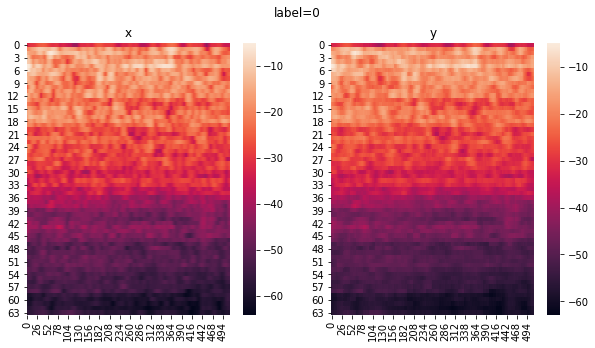

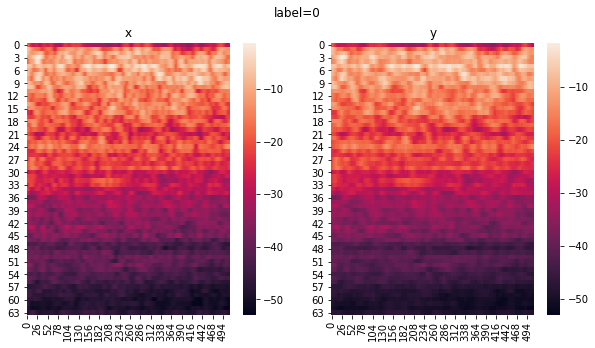

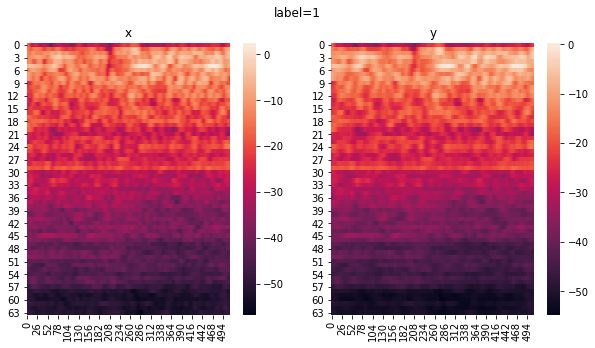

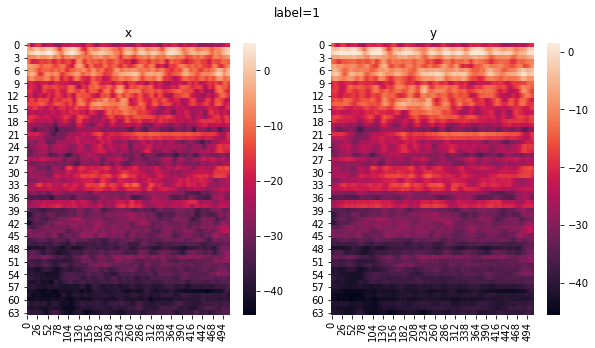

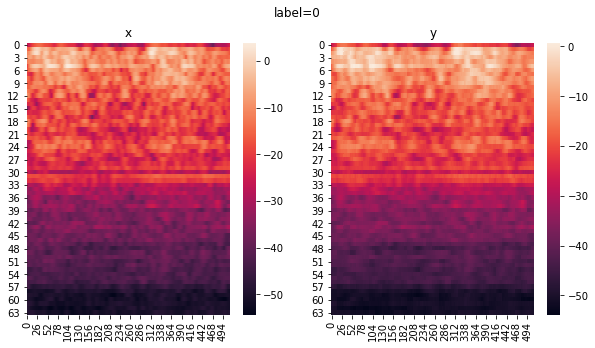

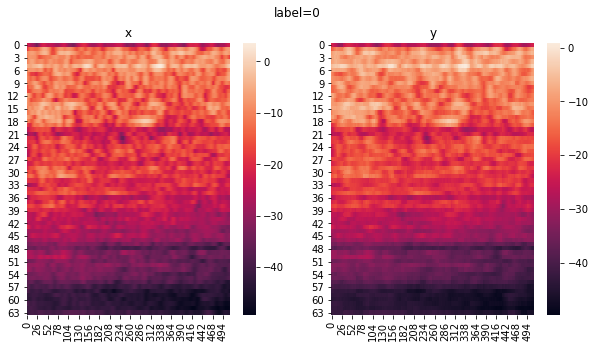

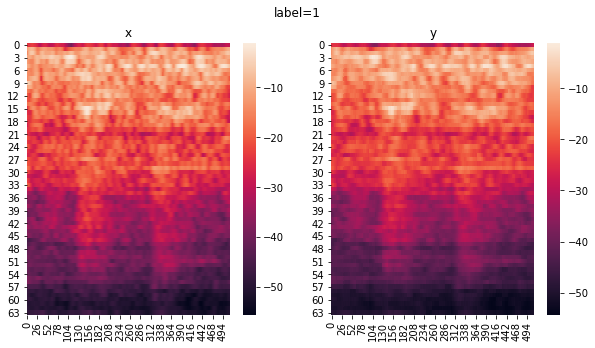

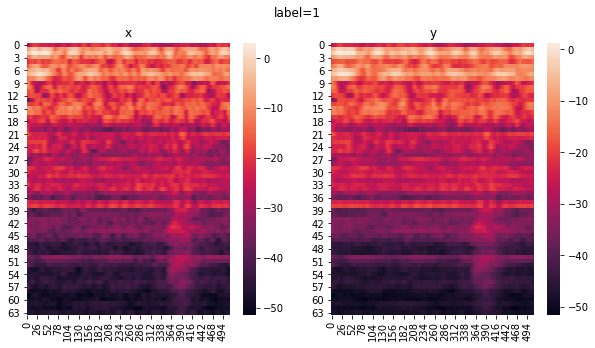

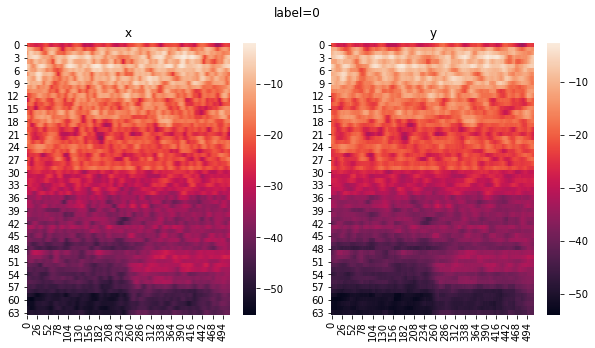

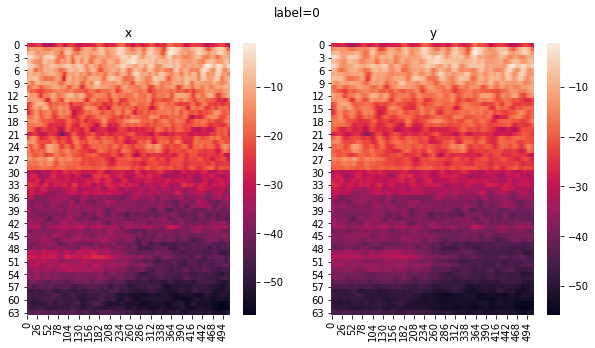

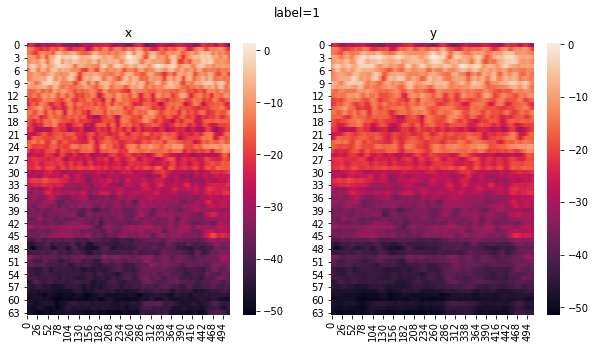

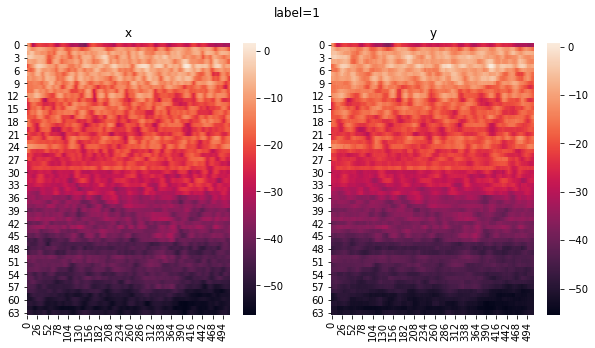

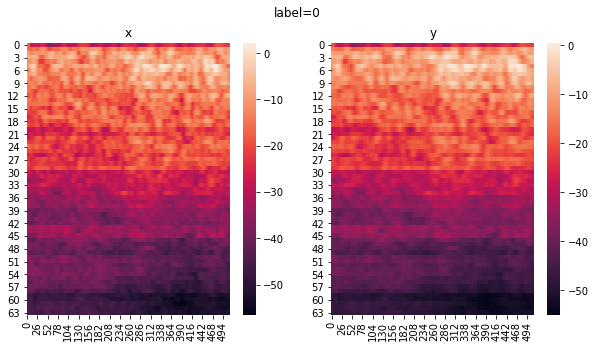

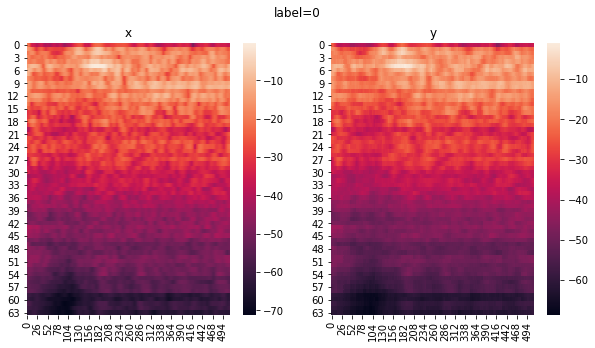

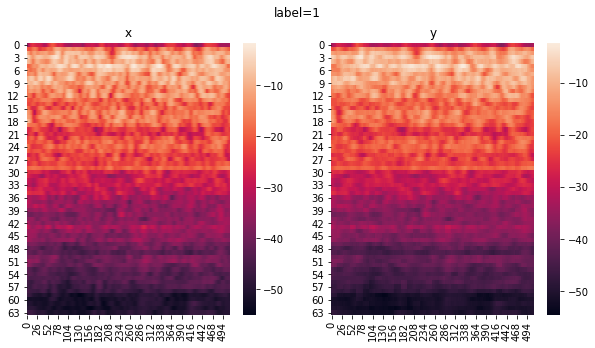

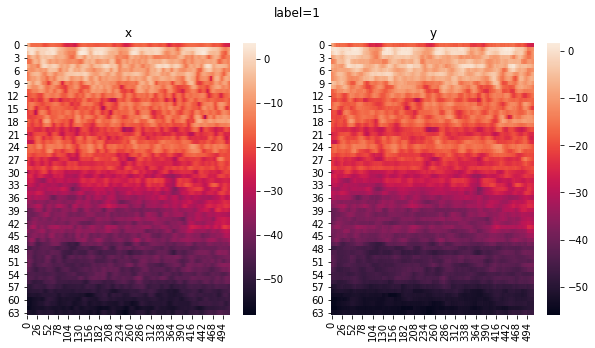

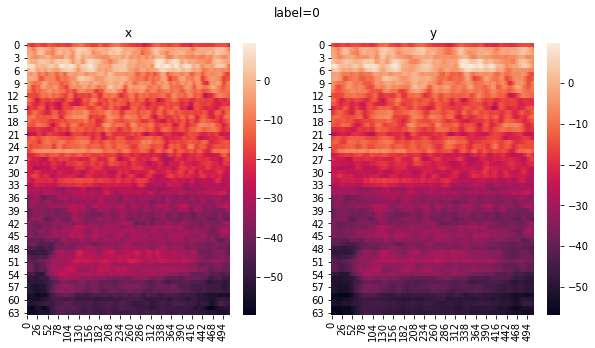

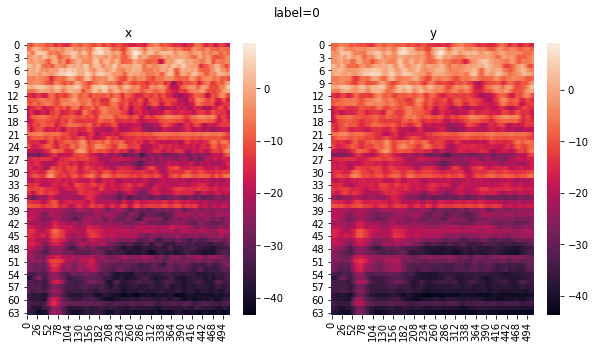

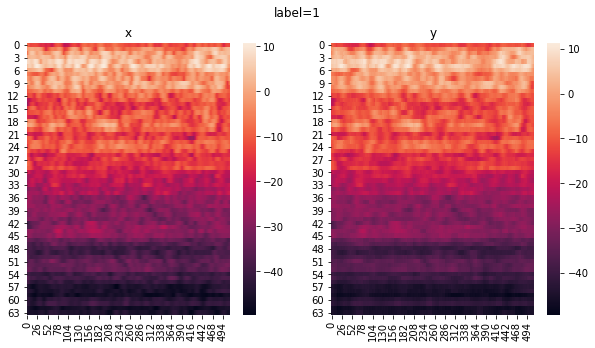

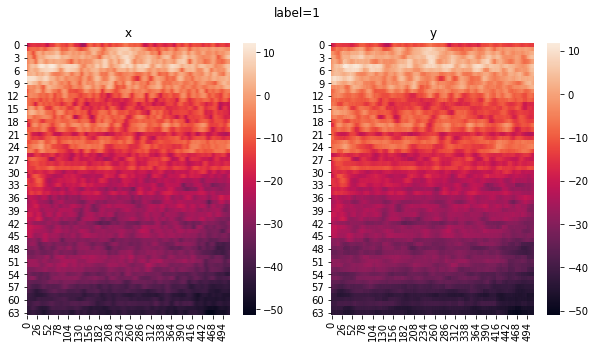

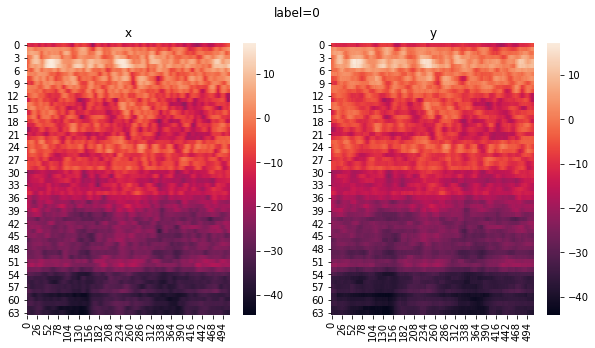

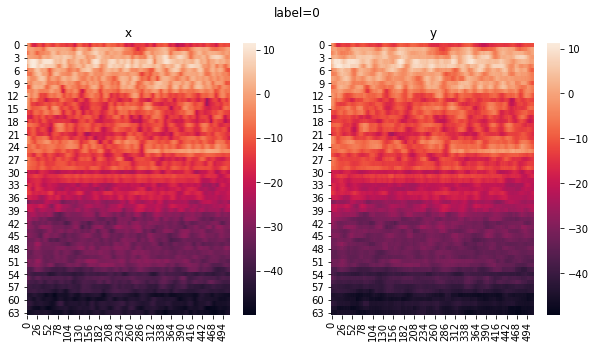

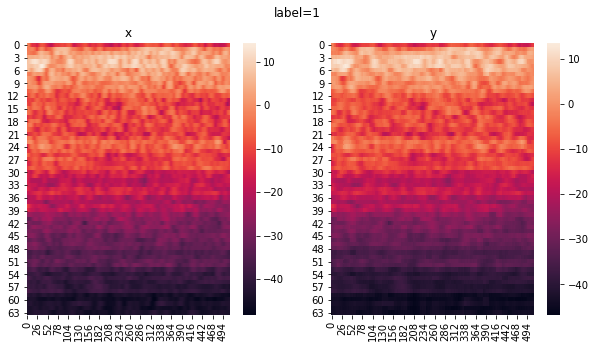

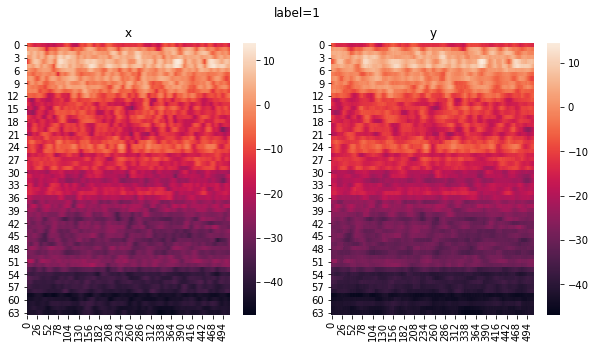

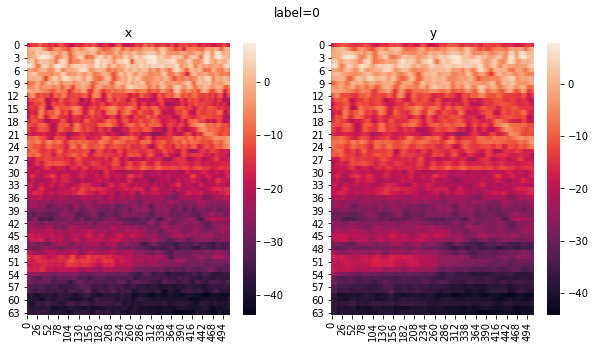

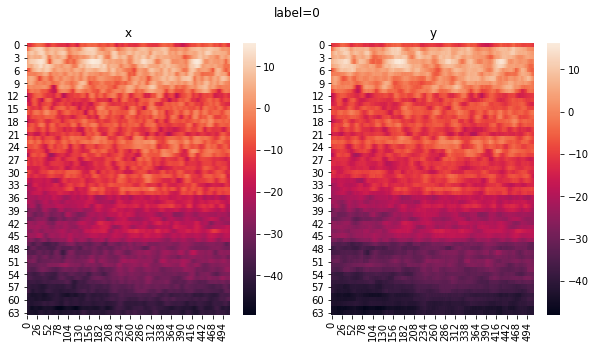

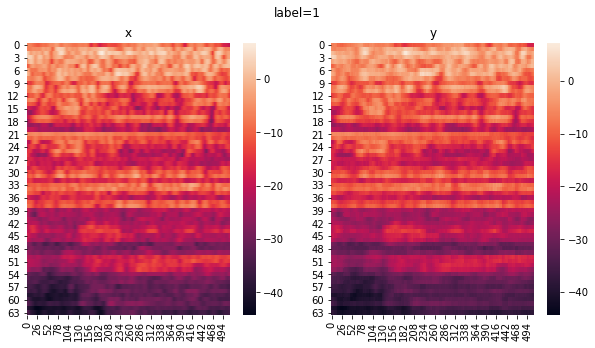

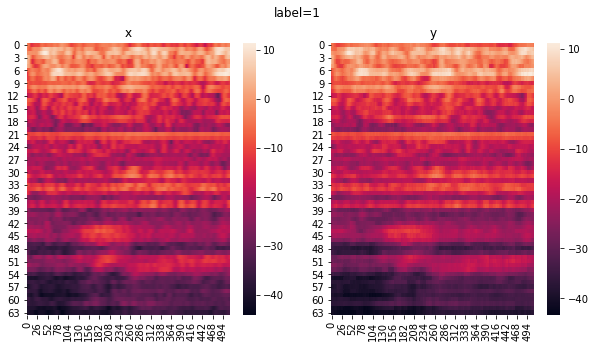

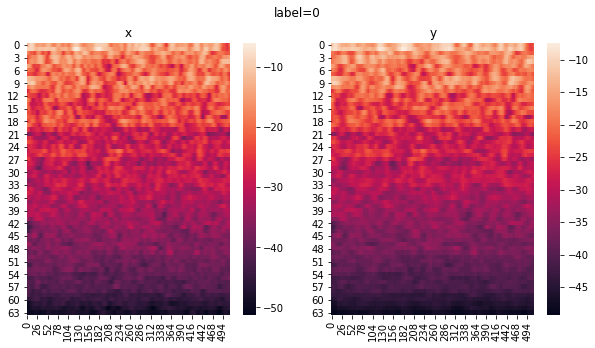

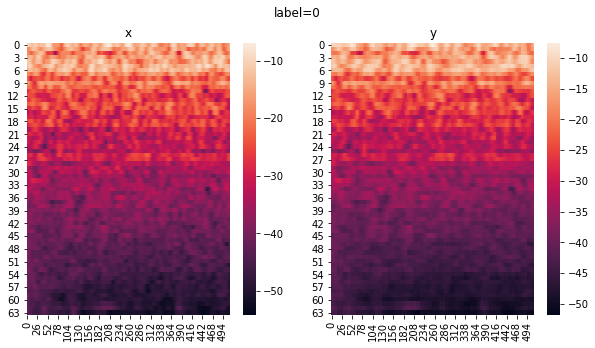

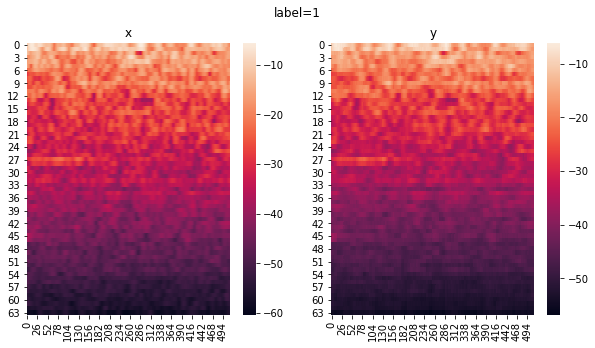

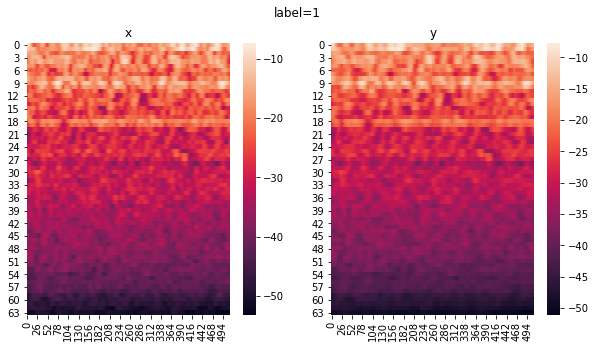

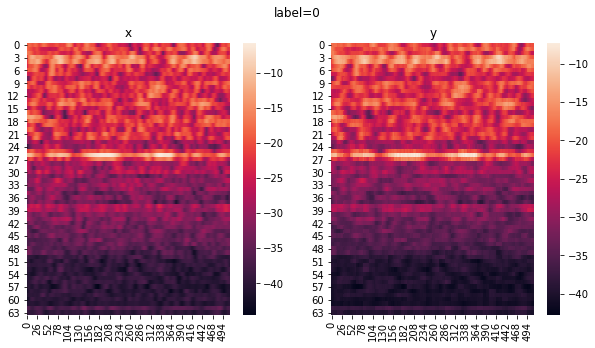

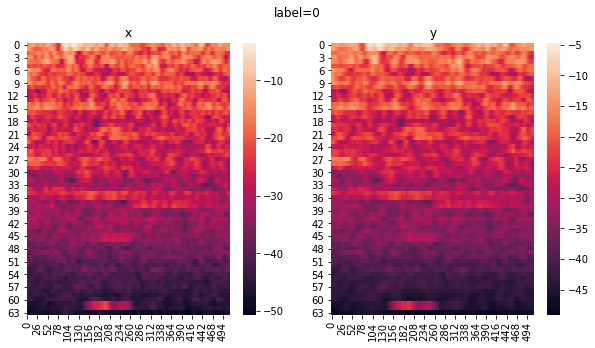

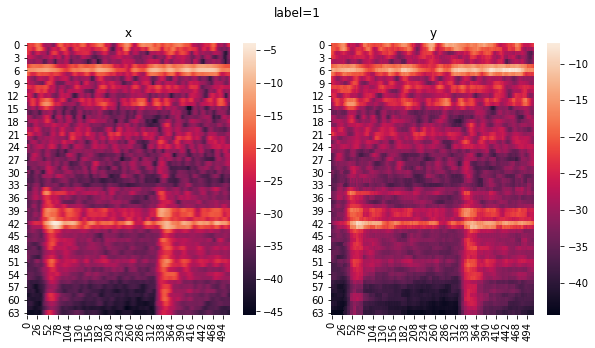

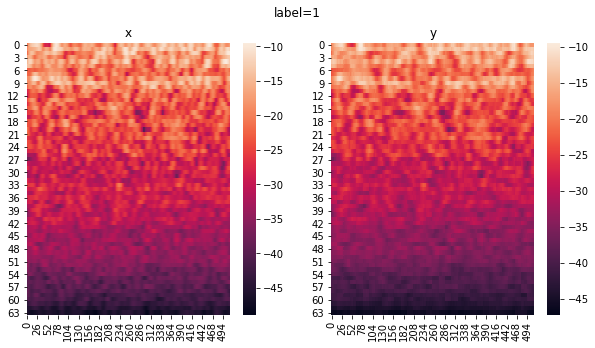

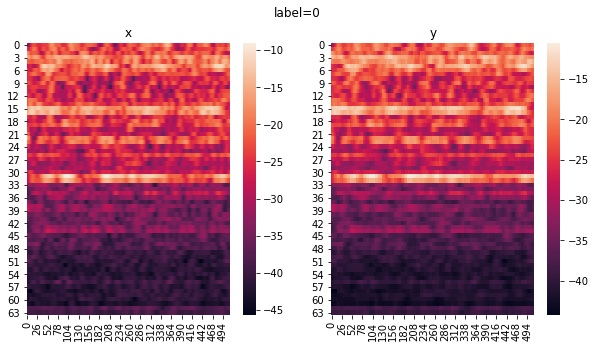

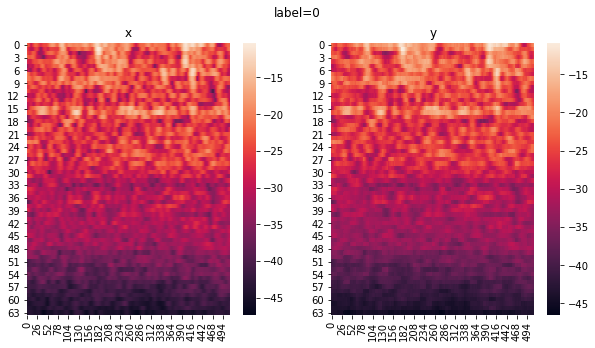

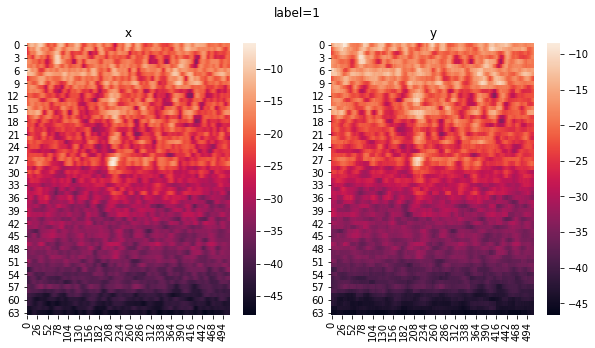

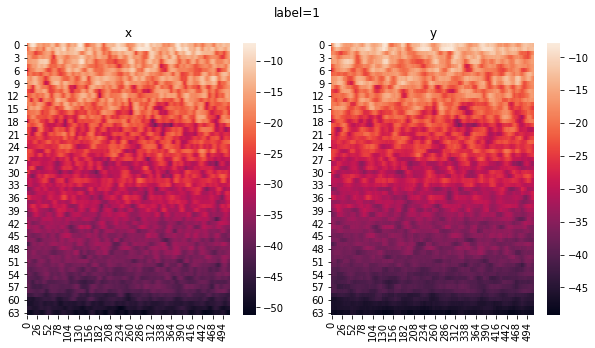

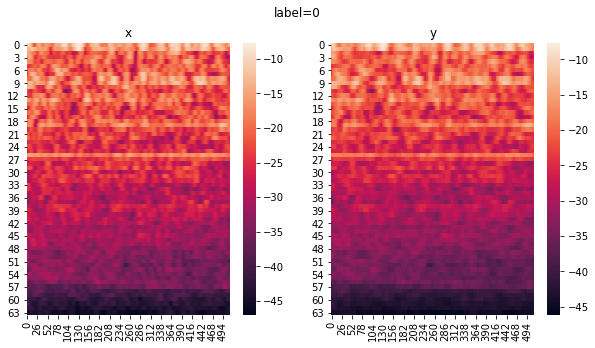

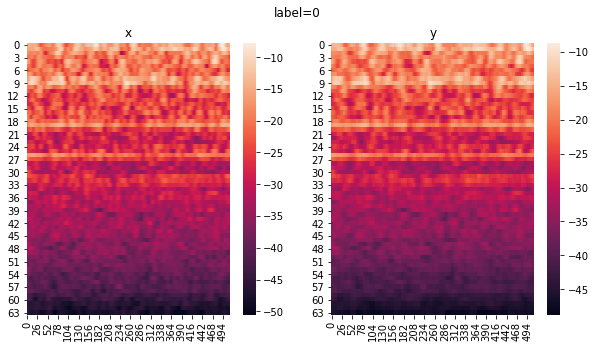

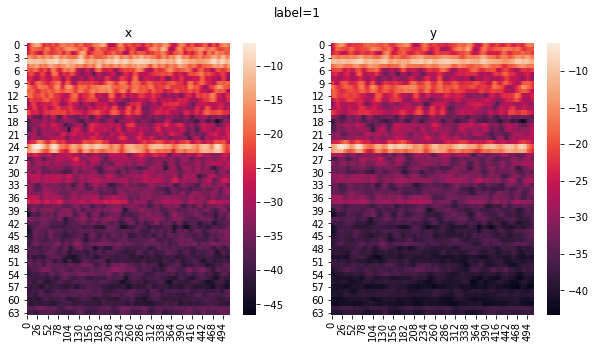

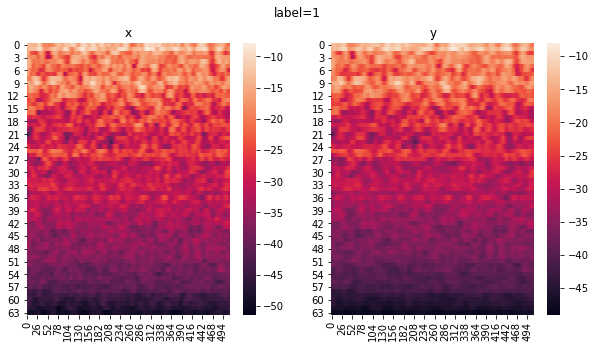

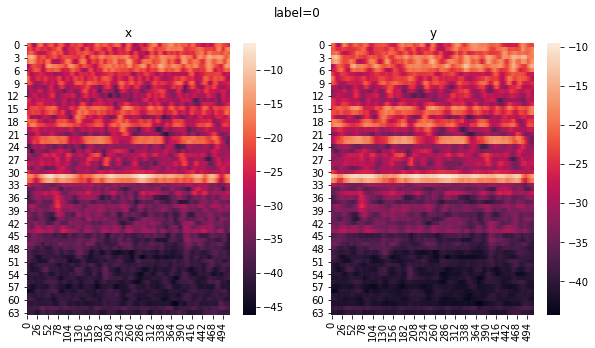

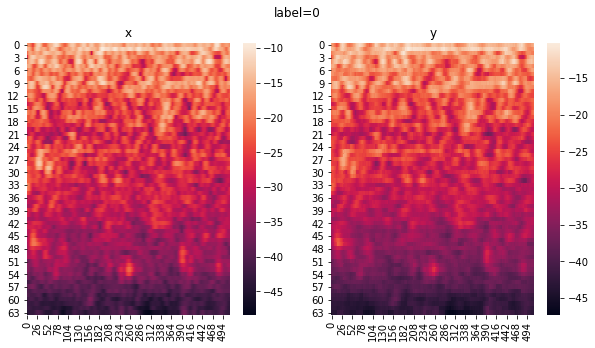

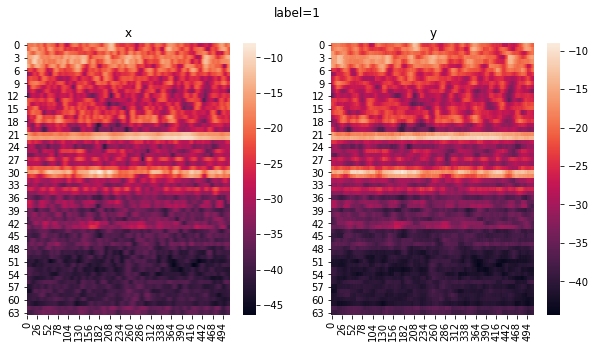

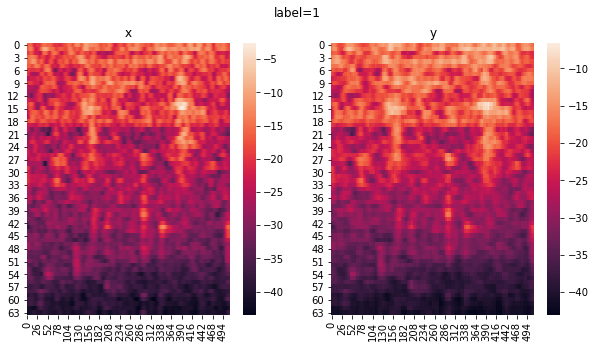

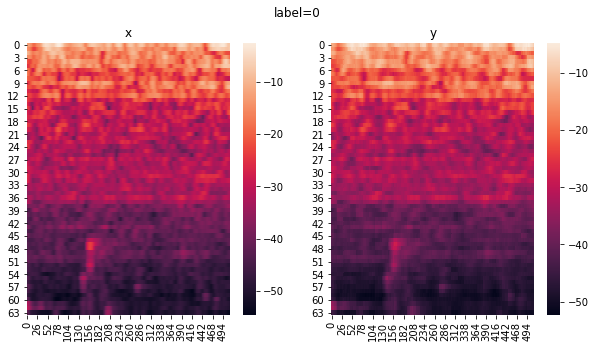

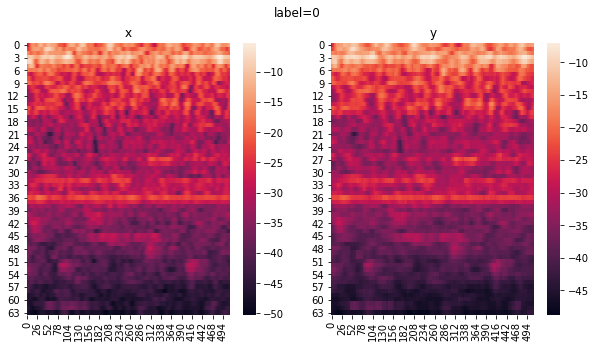

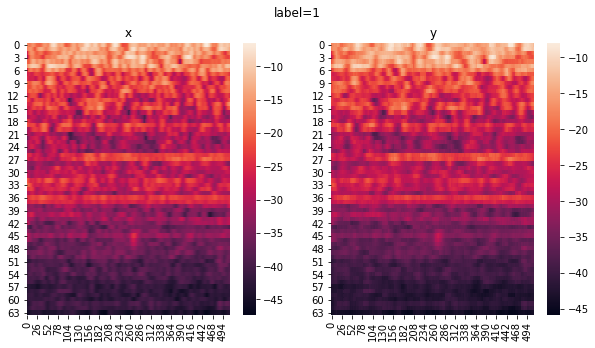

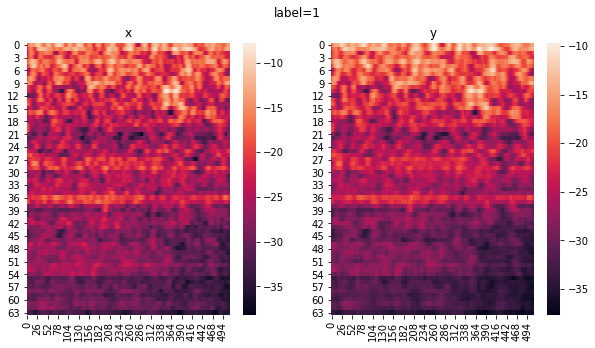

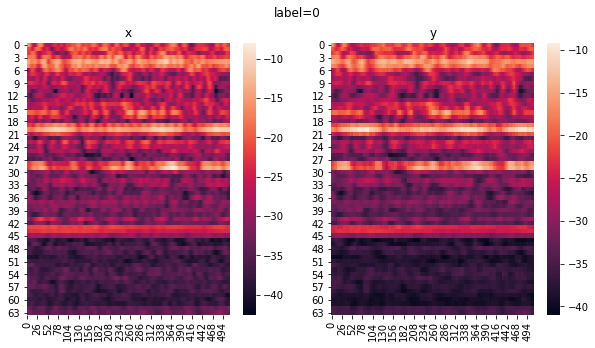

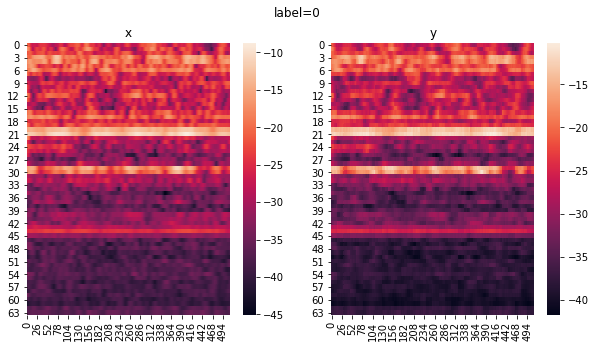

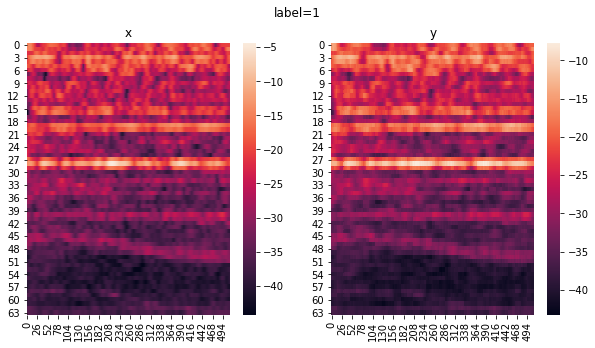

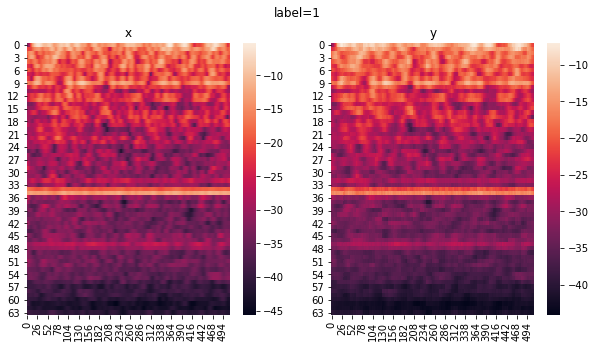

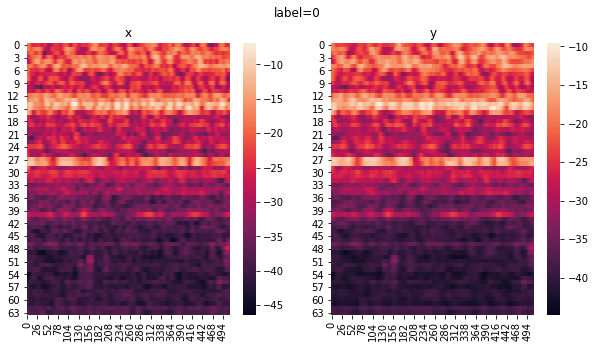

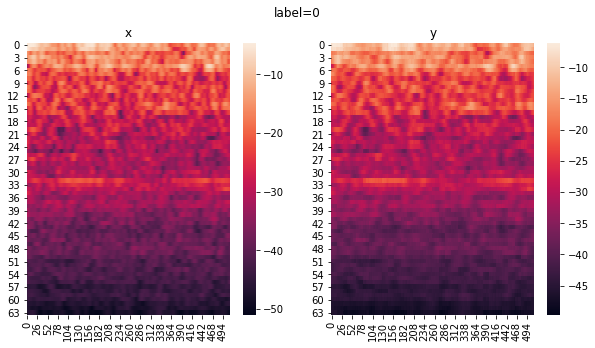

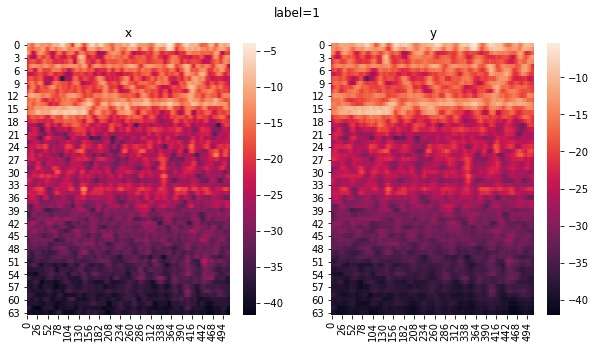

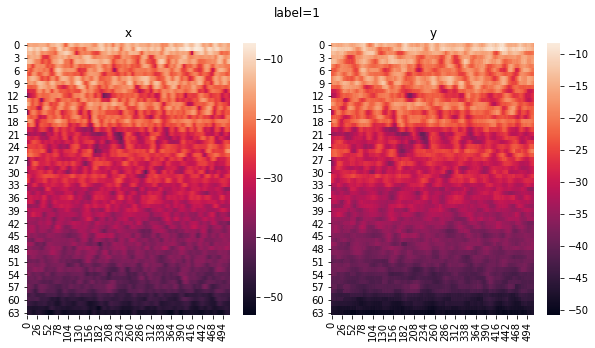

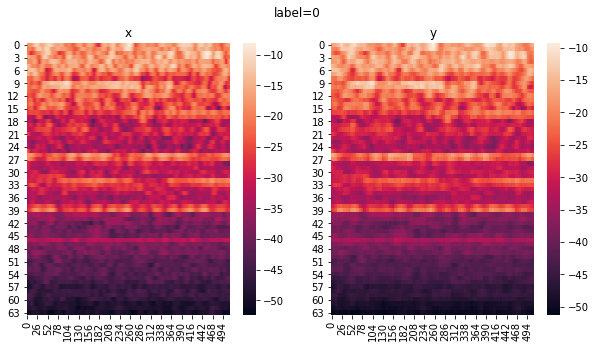

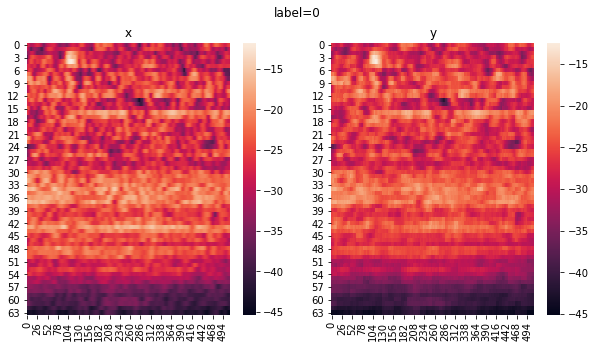

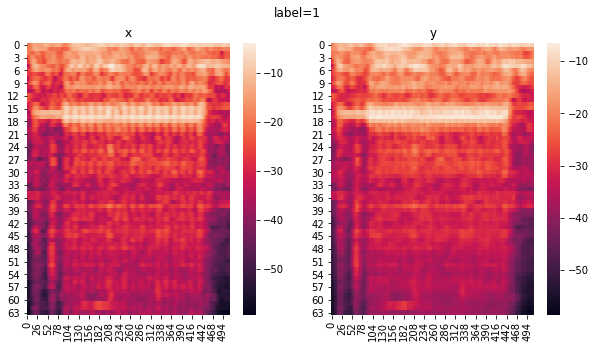

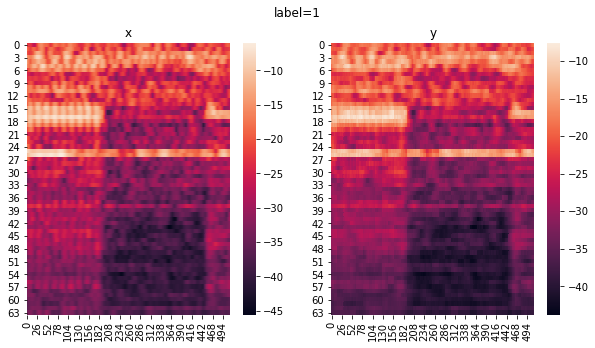

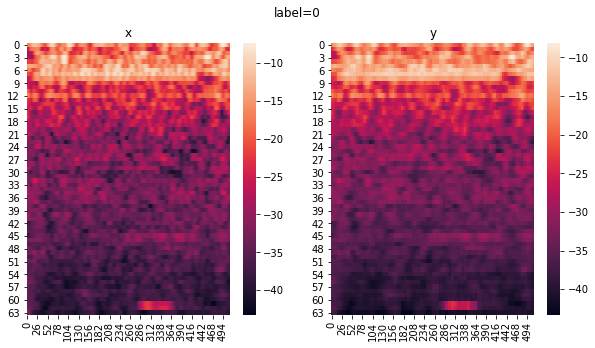

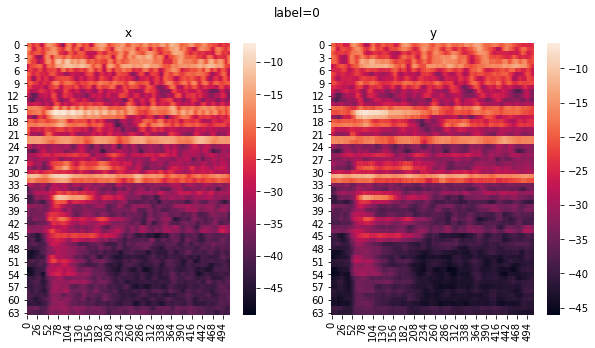

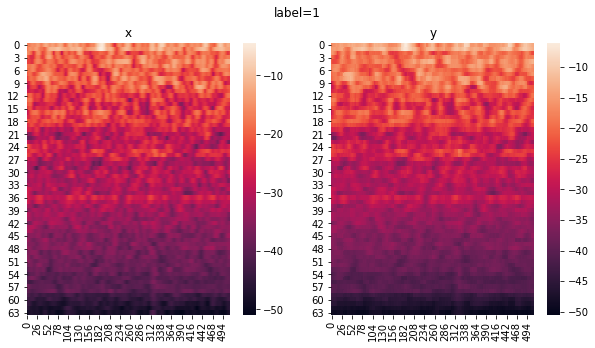

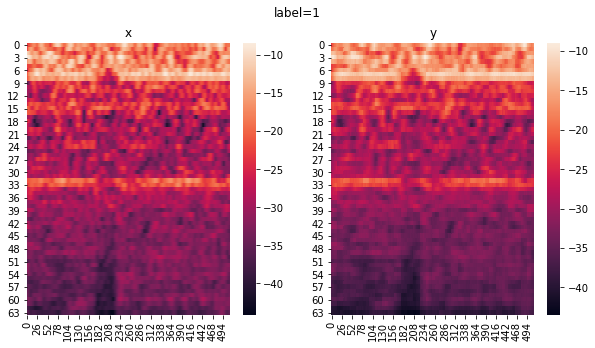

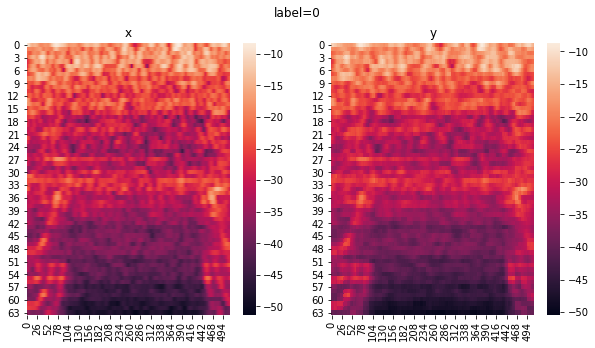

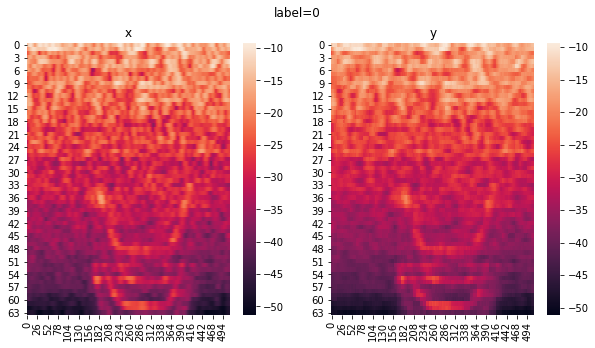

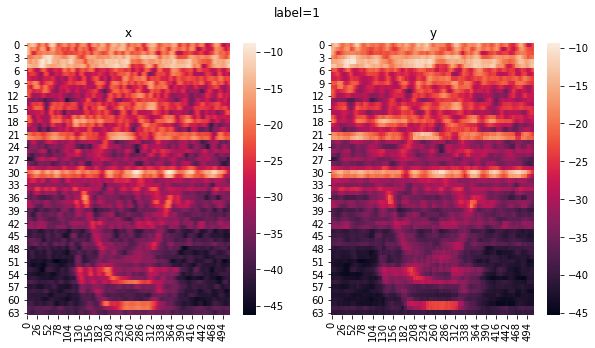

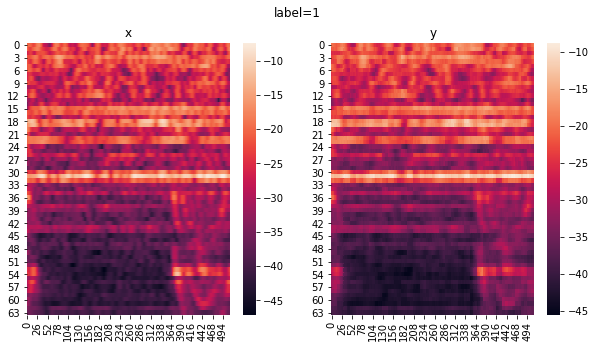

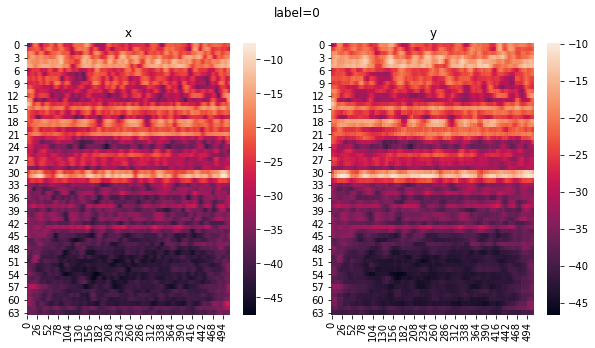

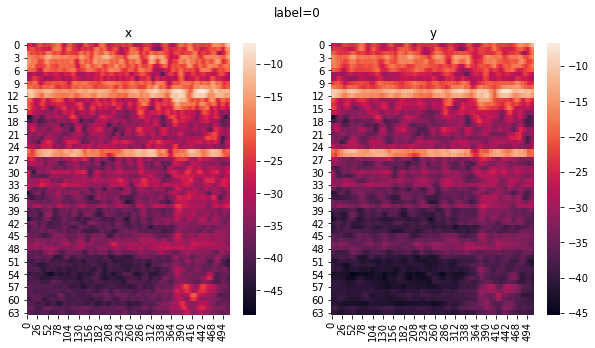

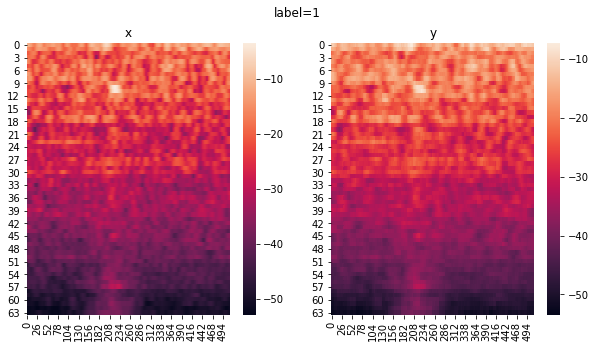

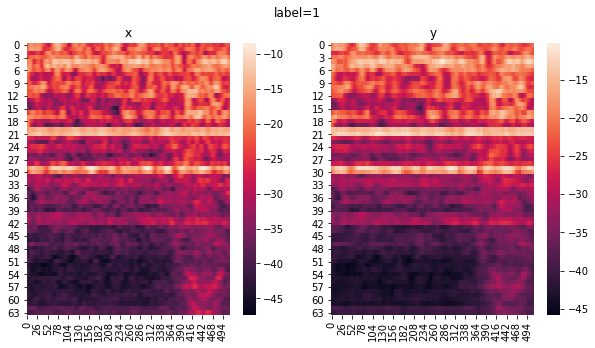

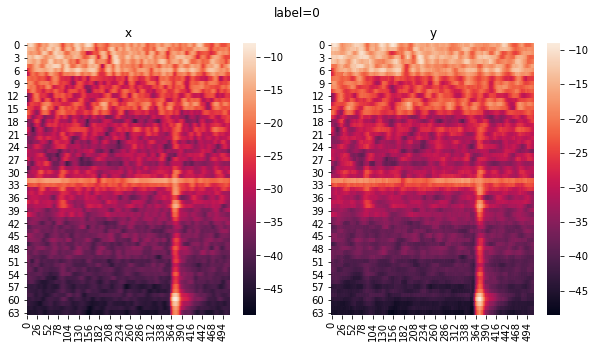

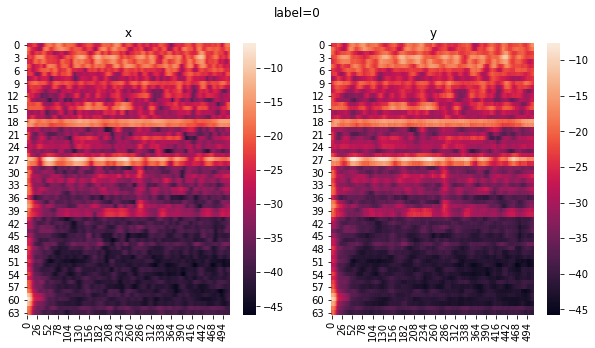

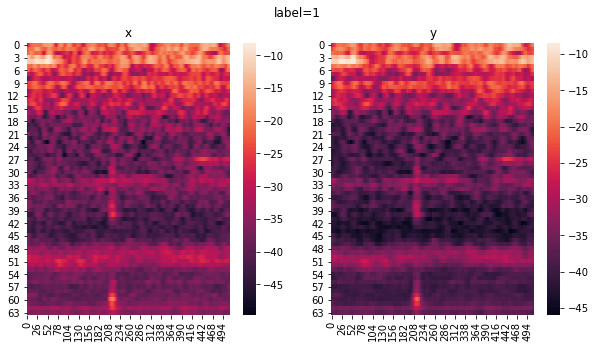

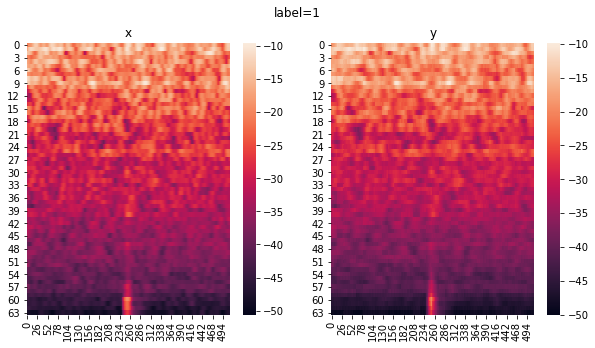

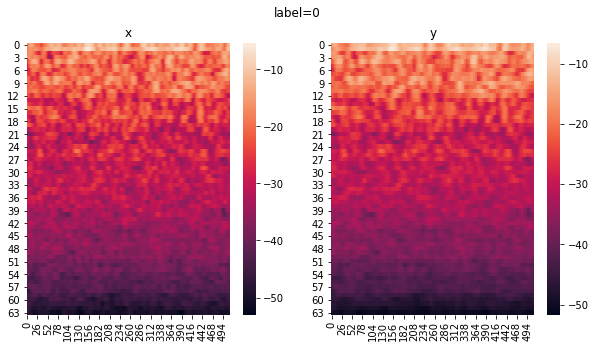

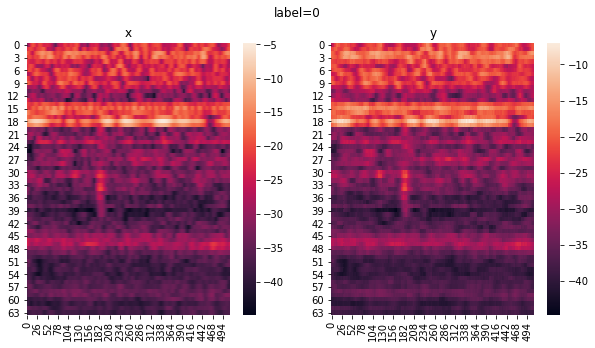

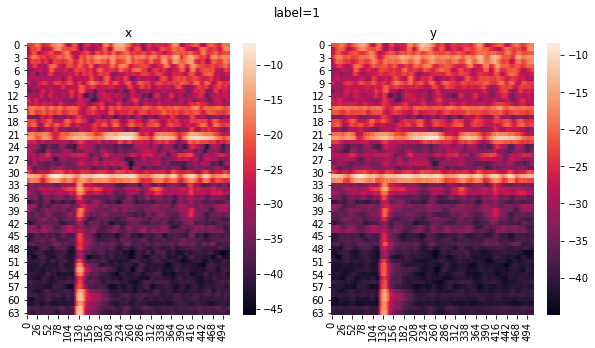

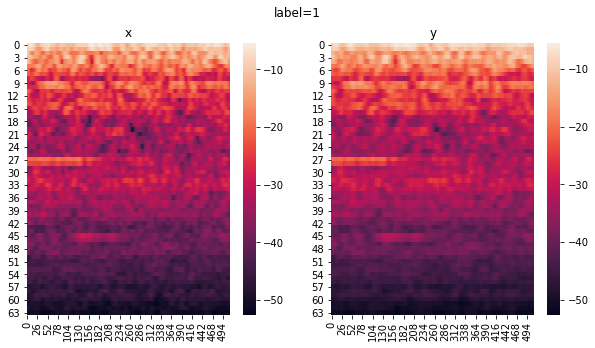

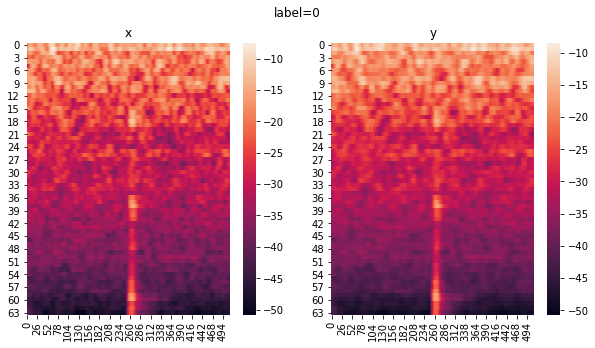

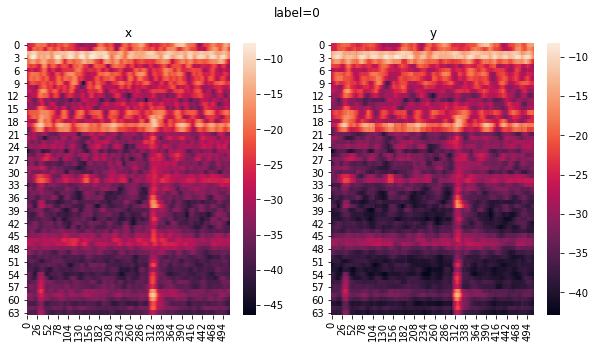

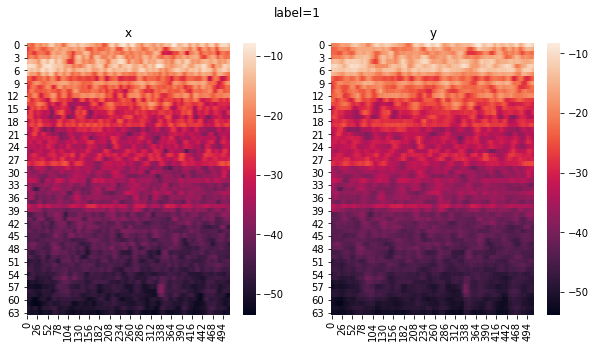

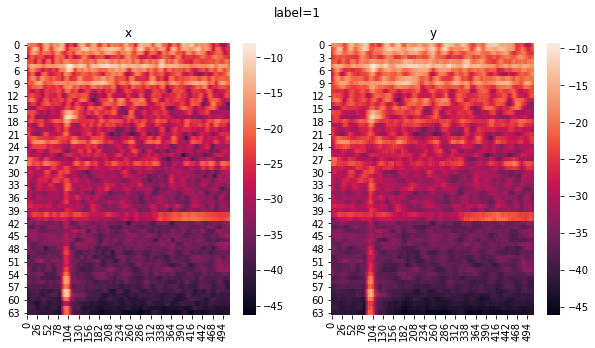

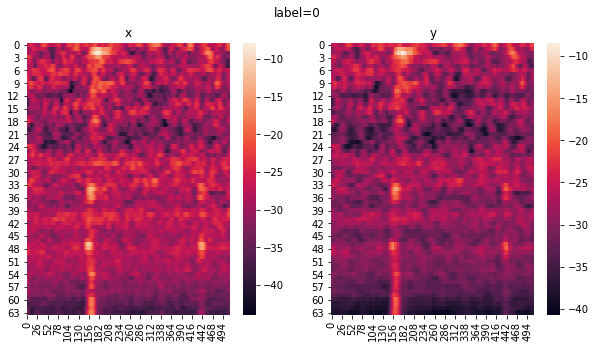

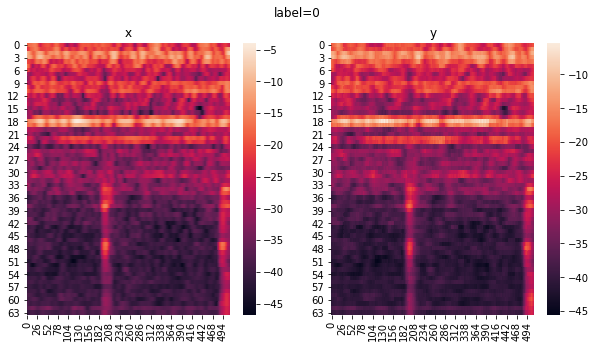

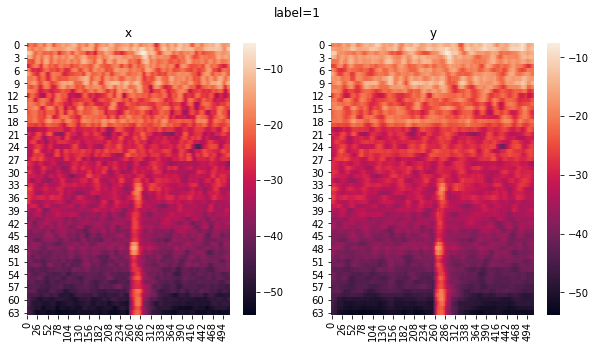

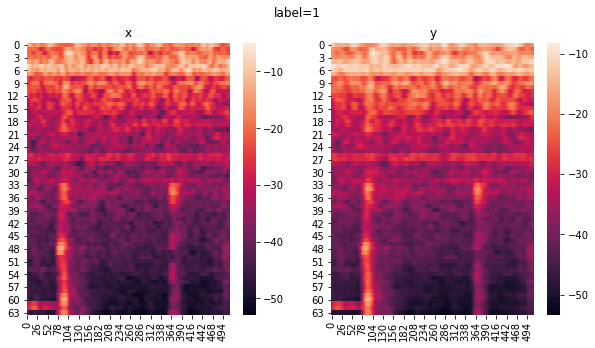

In [8]:
#def run_eval(param, mode):
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# make output result directory
os.makedirs(RESULT_DIR, exist_ok=True)

# load base directory
dirs = com.select_dirs(param=param, mode=mode)

# initialize lines in csv for AUC and pAUC
csv_lines = []


# loop of the base directory
for idx, target_dir in enumerate(dirs):
    com.logger.info("===========================")
    com.logger.info("[{idx}/{total}] {dirname}".format(
        dirname=target_dir, idx=idx+1, total=len(dirs)))

    machine_type = os.path.split(target_dir)[1]

    com.logger.info("============== MODEL LOAD ==============")

    model_file = "{model}/{machine_type}_model.pth".format(
        model=param["model_directory"],
        machine_type=machine_type)

    if not os.path.exists(model_file):
        com.logger.error("{} model not found ".format(machine_type))
        sys.exit(-1)

    # define AE model
    model = Model(sample_rate=config['preprocessing']['sample_rate'],
                  window_size=config['preprocessing']['window_size'],
                  hop_size=config['preprocessing']['hop_size'],
                  mel_bins=config['preprocessing']['mel_bins'],
                  fmin=config['preprocessing']['fmin'],
                  fmax=config['preprocessing']['fmax']).to(device)
    model.eval()
    model.load_state_dict(torch.load(model_file))

    if mode:
        # results by type
        csv_lines.append([machine_type])
        csv_lines.append(["id", "AUC", "pAUC"])
        performance = []

    machine_id_list = eval_func.get_machine_id_list_for_test(target_dir)
    recons_outpath = RECONS_OUTDIR + '/' + machine_type
    os.makedirs(recons_outpath, exist_ok=True)
    for id_str in machine_id_list:

        # load list of test files
        test_files, y_true = eval_func.test_file_list_generator(target_dir, id_str, mode)

        # setup anomaly score file path
        anomaly_score_csv = \
            "{result}/anomaly_score_{machine_type}_{id_str}.csv"\
            .format(result=param["result_directory"],
                    machine_type=machine_type,
                    id_str=id_str)
        anomaly_score_list = []

        com.logger.info(
            "============== BEGIN TEST FOR A MACHINE ID ==============")

        y_pred = [0. for k in test_files]
        anomaly_count = 0
        normal_count = 0
        for file_idx, file_path in enumerate(test_files):
            try:
                data = com.file_load(file_path)
                data = data[0]
                # reconstruction through auto encoder in pytorch
                input_data = torch.from_numpy(data).float().to(device)
                input_data = input_data.unsqueeze(0)
                with torch.no_grad():
                    output_dict = model(input_data)
                    pred = output_dict['loss'].to('cpu').detach().numpy().copy()
                    # make reconstruct_img
                    x = output_dict['x'].to('cpu')[0,:,:,0]
                    y = output_dict['y'].to('cpu')[0,:,:,0]
                    label = y_true[file_idx]
                    file_name = os.path.basename(file_path).replace('.wav', '')
                    file_name = recons_outpath + '/' + file_name
                    if int(label) == 1:
                        if anomaly_count == 1 or anomaly_count == 2:
                            make_reconstruct_img(x, y, label, file_name)
                        anomaly_count+=1
                    else:
                        if normal_count == 1 or normal_count == 2:
                            make_reconstruct_img(x, y, label, file_name)
                        normal_count+=1
                    
                y_pred[file_idx] = pred
                anomaly_score_list.append(
                    [os.path.basename(file_path), y_pred[file_idx]])
            except FileNotFoundError:
                com.logger.error("file broken!!: {}".format(file_path))

        # save anomaly score
        eval_func.save_csv(save_file_path=anomaly_score_csv,
                           save_data=anomaly_score_list)
        com.logger.info(
            "anomaly score result ->  {}".format(anomaly_score_csv))

        if mode:
            # append AUC and pAUC to lists
            auc = metrics.roc_auc_score(y_true, y_pred)
            p_auc = metrics.roc_auc_score(
                y_true, y_pred, max_fpr=config["etc"]["max_fpr"])
            csv_lines.append([id_str.split("_", 1)[1], auc, p_auc])
            performance.append([auc, p_auc])
            com.logger.info("AUC : {}".format(auc))
            com.logger.info("pAUC : {}".format(p_auc))

        com.logger.info(
            "============ END OF TEST FOR A MACHINE ID ============")

    if mode:
        # calculate averages for AUCs and pAUCs
        averaged_performance = numpy.mean(
            numpy.array(performance, dtype=float), axis=0)
        csv_lines.append(["Average"] + list(averaged_performance))
        csv_lines.append([])

if mode:
    # output results
    result_path = "{result}/{file_name}".format(
        result=param["result_directory"],
        file_name=param["result_file"])
    com.logger.info("AUC and pAUC results -> {}".format(result_path))
    eval_func.save_csv(save_file_path=result_path, save_data=csv_lines)